In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [8]:
df = pd.read_csv("Student_Performance.csv")
with pd.option_context("future.no_silent_downcasting", True): # df.replace is deprecated
    df = df.replace('Yes', 1).replace('No', 0)
df.isna().all()
df['Extra Hours'] = 24 - (df['Hours Studied'] + df['Sleep Hours'])

## Табличное представление статистики по датасету:

In [9]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extra Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,4.992900,69.445700,6.530600,4.583300,55.224800,12.4765
std,2.589309,17.343152,1.695863,2.867348,19.212558,3.0970
min,1.000000,40.000000,4.000000,0.000000,10.000000,6.0000
25%,3.000000,54.000000,5.000000,2.000000,40.000000,10.0000
50%,5.000000,69.000000,7.000000,5.000000,55.000000,12.0000
75%,7.000000,85.000000,8.000000,7.000000,71.000000,15.0000
max,9.000000,99.000000,9.000000,9.000000,100.000000,19.0000


## Графическое представление статистики по датасету:

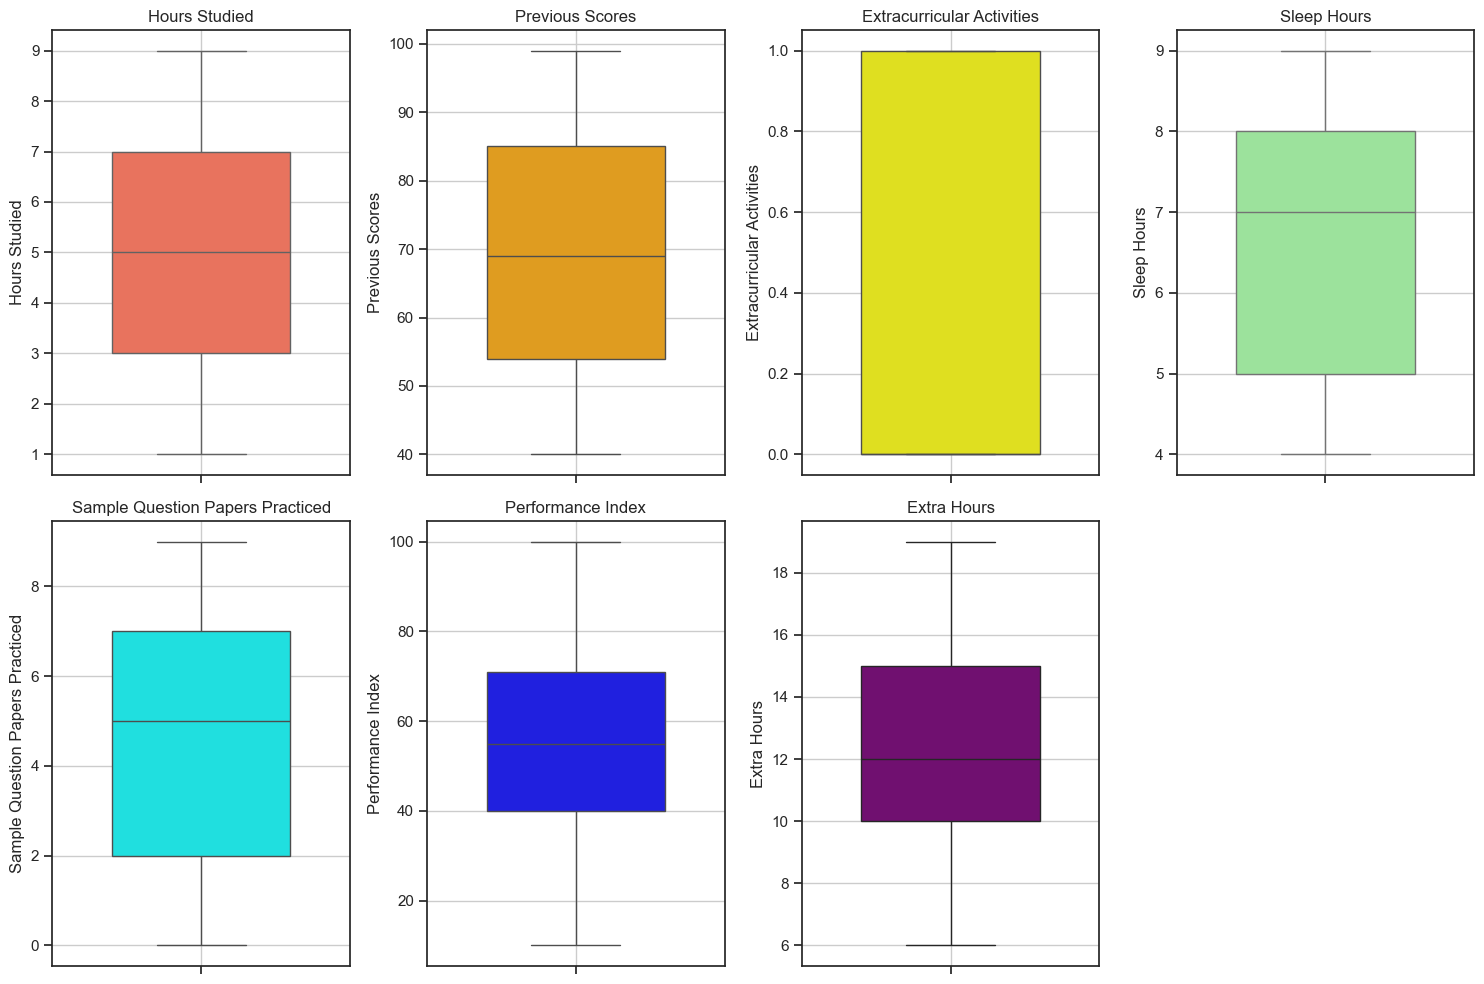

In [10]:
sns.set_theme(style="ticks")
plt.figure(figsize=(15, 10))

colors = ['tomato', 'orange', 'yellow', 'lightgreen', 'cyan', 'blue', 'purple']
parameters = df.columns

for i, parameter in enumerate(parameters):
    plt.subplot(2, 4, i+1)  # Устанавливаем положение подграфиков
    sns.boxplot(y=df[parameter], color=colors[i], width=0.6)
    plt.title(parameter)
    plt.grid()

plt.tight_layout()
plt.show()

## Нормирование значений:

In [11]:
scaled_df = pd.DataFrame(preprocessing.normalize(df), columns=list(df.columns))
scaled_df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extra Hours
0,0.051777,0.732269,0.007397,0.066570,0.007397,0.673096,0.059173
1,0.037727,0.773413,0.000000,0.037727,0.018864,0.613071,0.150910
2,0.115171,0.734212,0.014396,0.100774,0.028793,0.647834,0.129567
3,0.076687,0.797550,0.015337,0.076687,0.030675,0.552150,0.214725
4,0.069310,0.742611,0.000000,0.079212,0.049507,0.653497,0.089113
...,...,...,...,...,...,...,...
9995,0.017374,0.851305,0.017374,0.069494,0.034747,0.399592,0.330098
9996,0.079876,0.730297,0.011411,0.091287,0.057054,0.661831,0.102698
9997,0.053471,0.739687,0.008912,0.071295,0.044559,0.659480,0.089119
9998,0.065940,0.710685,0.007327,0.051287,0.000000,0.696031,0.058613


## Разделение данных:

In [12]:
# Устанавливаем случайное состояние для воспроизводимости
np.random.seed(42)

# Генерируем случайные индексы и перемешиваем их
shuffled_indices = np.random.permutation(scaled_df.index)

# Определяем размер тестовой выборки
test_size = int(0.3 * len(scaled_df))
test_indices = shuffled_indices[:test_size]
train_indices = shuffled_indices[test_size:]

# Делим данные на обучающую и тестовую выборки
X = scaled_df.drop("Performance Index", axis=1).values  # Все предикторы
y = scaled_df["Performance Index"].values  # Целевая переменная

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

## Реализация линейной регрессии с использованием метода наименьших квадратов

In [13]:
def calculate_coefficients(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X] 
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(theta)

# R²
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

## Построение моделей

In [18]:
# Модель 1: Первый набор признаков
feature_indices_model1 = [0, 1]  # Индексы для 'Hours Studied' и 'Previous Scores'
X_train_model1 = X_train[:, feature_indices_model1]
X_test_model1 = X_test[:, feature_indices_model1]

theta_model1 = calculate_coefficients(X_train_model1, y_train)
y_pred_model1 = predict(X_test_model1, theta_model1)
r2_model1 = r_squared(y_test, y_pred_model1)

# Модель 2: Второй набор признаков
feature_indices_model2 = [0, 2, 3]  # Индексы для 'Hours Studied', 'Sleep Hours', 'Extracurricular Activities'
X_train_model2 = X_train[:, feature_indices_model2]
X_test_model2 = X_test[:, feature_indices_model2]

theta_model2 = calculate_coefficients(X_train_model2, y_train)
y_pred_model2 = predict(X_test_model2, theta_model2)
r2_model2 = r_squared(y_test, y_pred_model2)

# Модель 3: Третий набор признаков
feature_indices_model3 = [0, 1, 2, 4, 5]  # Индексы для 'Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extra Hours'
X_train_model3 = X_train[:, feature_indices_model3]
X_test_model3 = X_test[:, feature_indices_model3]

theta_model3 = calculate_coefficients(X_train_model3, y_train)
y_pred_model3 = predict(X_test_model3, theta_model3)
r2_model3 = r_squared(y_test, y_pred_model3)


# Результаты
print(f"R² для модели 1: {r2_model1:.4f}")
print(f"R² для модели 2: {r2_model2:.4f}")
print(f"R² для модели 3: {r2_model3:.4f}")

R² для модели 1: 0.9222
R² для модели 2: 0.4990
R² для модели 3: 0.9617
